In [1]:
#1 Question1
def matrix_chain_order(dims):
    n = len(dims) - 1  # Number of matrices
    dp = [[0] * n for _ in range(n)]  # Minimum multiplication costs
    split = [[0] * n for _ in range(n)]  # Track splits for optimal sequence

    # l is the chain length (from 2 to n)
    for l in range(2, n + 1):
        for i in range(n - l + 1):
            j = i + l - 1
            dp[i][j] = float('inf')
            for k in range(i, j):
                cost = dp[i][k] + dp[k + 1][j] + dims[i] * dims[k + 1] * dims[j + 1]
                if cost < dp[i][j]:
                    dp[i][j] = cost
                    split[i][j] = k

    return dp, split

def optimal_parenthesis(split, i, j):
    if i == j:
        return f"A{i+1}"
    return f"({optimal_parenthesis(split, i, split[i][j])} x {optimal_parenthesis(split, split[i][j] + 1, j)})"

# Dimensions of matrices
dims = [5, 7, 3, 11, 7, 5, 3]  # A1 (5x7), A2 (3x7), A3 (11x7), A4 (7x5), A5 (7x3)

# Solve
dp, split = matrix_chain_order(dims)
optimal_seq = optimal_parenthesis(split, 0, len(dims) - 2)

print("Minimum number of scalar multiplications:", dp[0][len(dims) - 2])
print("Optimal sequence of multiplication:", optimal_seq)


Minimum number of scalar multiplications: 531
Optimal sequence of multiplication: ((A1 x A2) x (((A3 x A4) x A5) x A6))


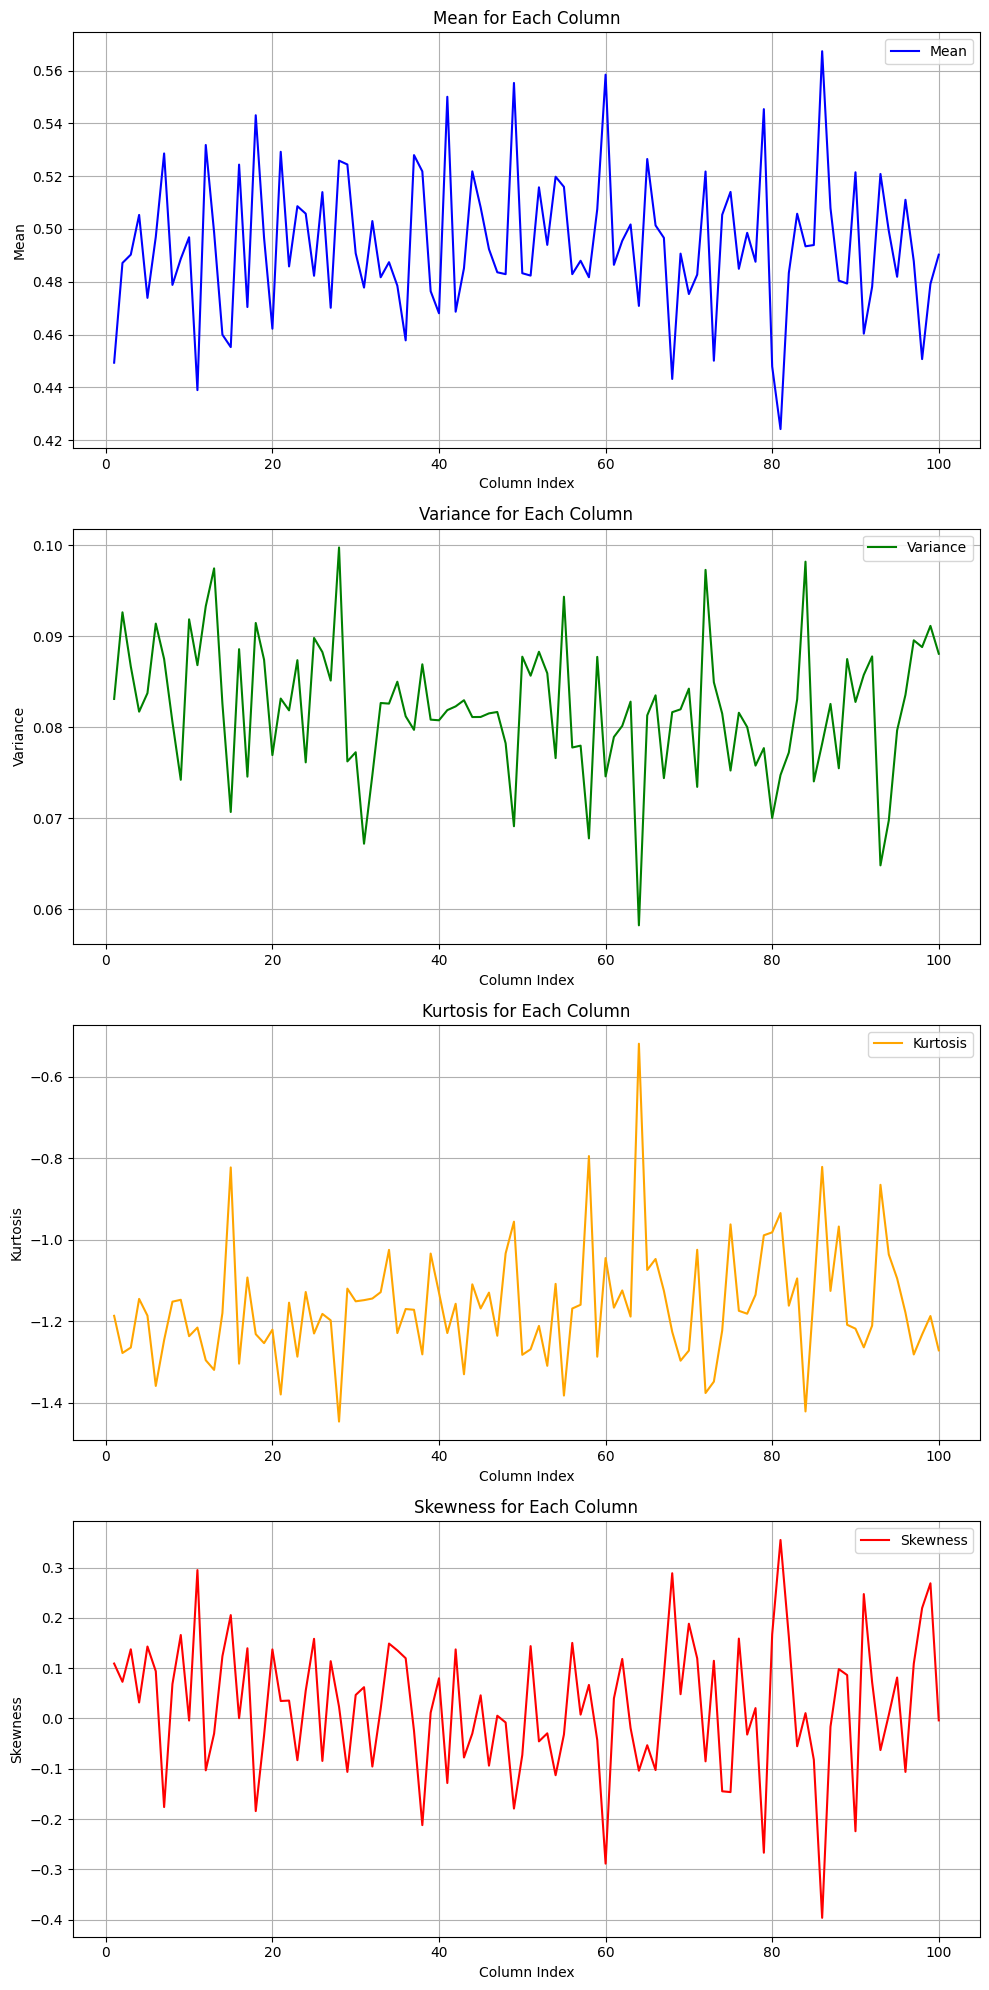

In [2]:
#2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Generate a random 100 × 100 matrix
np.random.seed(42)  # For reproducibility
matrix = np.random.rand(100, 100)

# Calculate metrics for each column
means = np.mean(matrix, axis=0)
variances = np.var(matrix, axis=0)
kurtoses = kurtosis(matrix, axis=0)
skewnesses = skew(matrix, axis=0)

# Plot the metrics
fig, axs = plt.subplots(4, 1, figsize=(10, 20))
columns = np.arange(1, 101)

# Plot Mean
axs[0].plot(columns, means, label="Mean", color="blue")
axs[0].set_title("Mean for Each Column")
axs[0].set_xlabel("Column Index")
axs[0].set_ylabel("Mean")
axs[0].grid()
axs[0].legend()

# Plot Variance
axs[1].plot(columns, variances, label="Variance", color="green")
axs[1].set_title("Variance for Each Column")
axs[1].set_xlabel("Column Index")
axs[1].set_ylabel("Variance")
axs[1].grid()
axs[1].legend()

# Plot Kurtosis
axs[2].plot(columns, kurtoses, label="Kurtosis", color="orange")
axs[2].set_title("Kurtosis for Each Column")
axs[2].set_xlabel("Column Index")
axs[2].set_ylabel("Kurtosis")
axs[2].grid()
axs[2].legend()

# Plot Skewness
axs[3].plot(columns, skewnesses, label="Skewness", color="red")
axs[3].set_title("Skewness for Each Column")
axs[3].set_xlabel("Column Index")
axs[3].set_ylabel("Skewness")
axs[3].grid()
axs[3].legend()

plt.tight_layout()
plt.show()


In [3]:
#3
import numpy as np

# Step 1: Take two fuzzy sets A and B as user input
# Assuming the user inputs the number of elements in each set
num_elements = int(input("Enter the number of elements in fuzzy sets A and B: "))

# Define fuzzy sets A and B with values in the range [10, 200]
set_A = np.random.randint(10, 201, size=num_elements)
set_B = np.random.randint(10, 201, size=num_elements)

# Step 2: Assign random membership values in the range [0, 1]
membership_A = np.random.rand(num_elements)
membership_B = np.random.rand(num_elements)

# Step 3: Implement fuzzy set union and intersection
# Union: max(membership_A, membership_B) for each element
union_membership = np.maximum(membership_A, membership_B)

# Intersection: min(membership_A, membership_B) for each element
intersection_membership = np.minimum(membership_A, membership_B)

# Display the results
print("Fuzzy Set A:")
for val, mem in zip(set_A, membership_A):
    print(f"Value: {val}, Membership: {mem:.2f}")

print("\nFuzzy Set B:")
for val, mem in zip(set_B, membership_B):
    print(f"Value: {val}, Membership: {mem:.2f}")

print("\nUnion Membership:")
for i in range(num_elements):
    print(f"Union Membership for element {i + 1}: {union_membership[i]:.2f}")

print("\nIntersection Membership:")
for i in range(num_elements):
    print(f"Intersection Membership for element {i + 1}: {intersection_membership[i]:.2f}")


Enter the number of elements in fuzzy sets A and B: 12
Fuzzy Set A:
Value: 192, Membership: 0.50
Value: 105, Membership: 0.01
Value: 45, Membership: 0.01
Value: 123, Membership: 0.24
Value: 46, Membership: 0.10
Value: 23, Membership: 0.26
Value: 164, Membership: 0.18
Value: 132, Membership: 0.03
Value: 92, Membership: 0.91
Value: 168, Membership: 0.01
Value: 82, Membership: 0.74
Value: 111, Membership: 0.15

Fuzzy Set B:
Value: 90, Membership: 0.91
Value: 92, Membership: 0.89
Value: 53, Membership: 0.65
Value: 77, Membership: 0.67
Value: 57, Membership: 0.01
Value: 66, Membership: 0.98
Value: 84, Membership: 0.88
Value: 31, Membership: 0.90
Value: 141, Membership: 0.66
Value: 55, Membership: 0.34
Value: 196, Membership: 0.89
Value: 171, Membership: 0.29

Union Membership:
Union Membership for element 1: 0.91
Union Membership for element 2: 0.89
Union Membership for element 3: 0.65
Union Membership for element 4: 0.67
Union Membership for element 5: 0.10
Union Membership for element 6: 

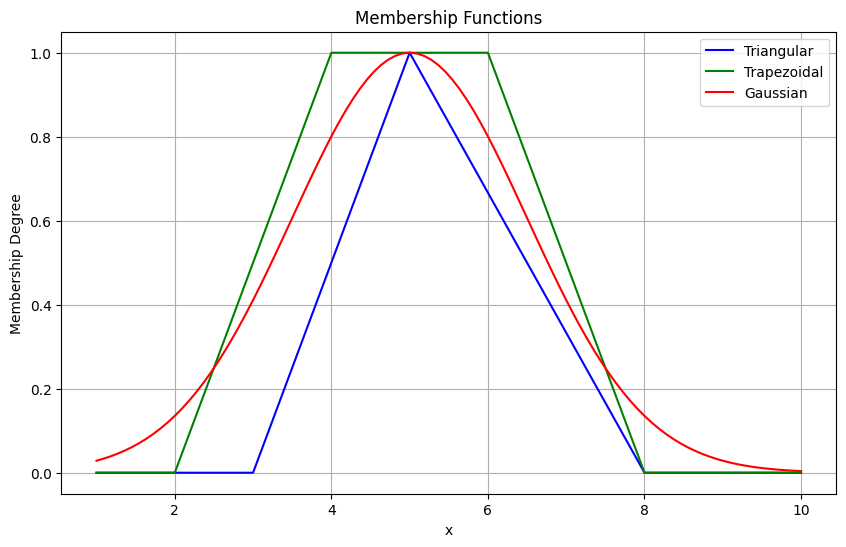

In [4]:
#4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for the fuzzy set
x = np.linspace(1, 10, 100)

# 1. Triangular Membership Function
def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# 2. Trapezoidal Membership Function
def trapezoidal(x, a, b, c, d):
    return np.maximum(0, np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)))

# 3. Gaussian Membership Function
def gaussian(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma)**2)

# Parameters for each membership function
tri_params = (3, 5, 8)
trap_params = (2, 4, 6, 8)
gauss_params = (5, 1.5)

# Calculate membership values
tri_y = triangular(x, *tri_params)
trap_y = trapezoidal(x, *trap_params)
gauss_y = gaussian(x, *gauss_params)

# Plot the membership functions
plt.figure(figsize=(10, 6))

plt.plot(x, tri_y, label="Triangular", color="blue")
plt.plot(x, trap_y, label="Trapezoidal", color="green")
plt.plot(x, gauss_y, label="Gaussian", color="red")

plt.title("Membership Functions")
plt.xlabel("x")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


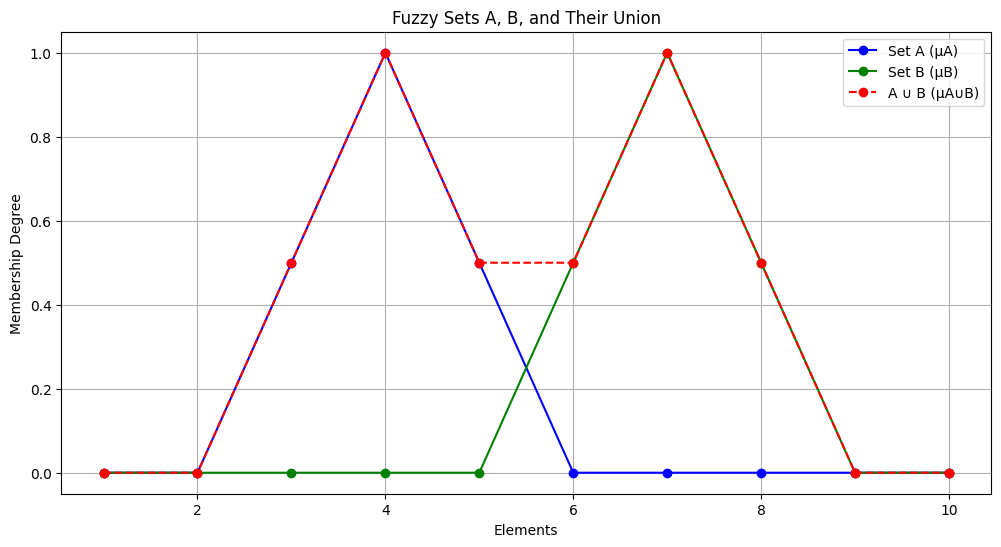

In [5]:
#5
import numpy as np
import matplotlib.pyplot as plt

# Define the universe of discourse
x = np.linspace(1, 10, 10)

# Triangular Membership Function
def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

# Fuzzy sets A and B
# Membership parameters for A: peak at 4
tri_params_A = (2, 4, 6)
mu_A = triangular(x, *tri_params_A)

# Membership parameters for B: peak at 7
tri_params_B = (5, 7, 9)
mu_B = triangular(x, *tri_params_B)

# Fuzzy Union operation (maximum of membership values)
mu_union = np.maximum(mu_A, mu_B)

# Plot the membership functions and their union
plt.figure(figsize=(12, 6))

# Plot set A
plt.plot(x, mu_A, label="Set A (µA)", color="blue", marker="o")

# Plot set B
plt.plot(x, mu_B, label="Set B (µB)", color="green", marker="o")

# Plot union
plt.plot(x, mu_union, label="A ∪ B (µA∪B)", color="red", linestyle="--", marker="o")

plt.title("Fuzzy Sets A, B, and Their Union")
plt.xlabel("Elements")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


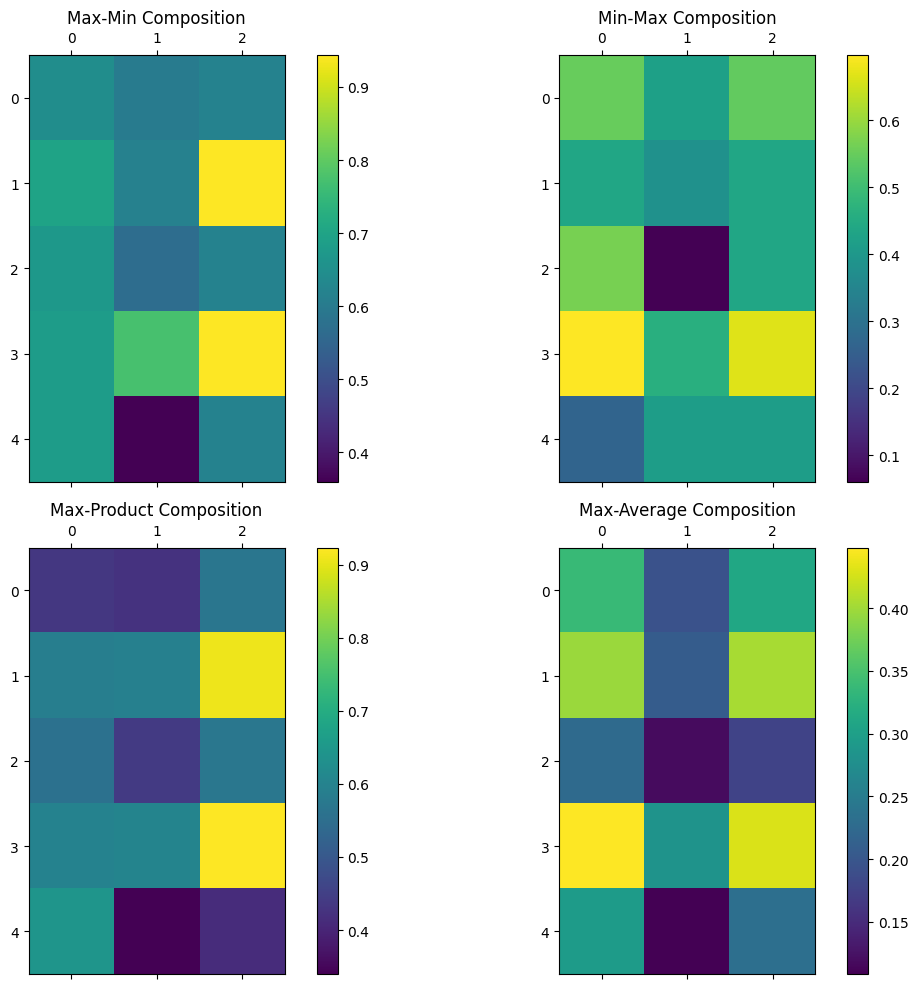

In [10]:
#6
import numpy as np
import matplotlib.pyplot as plt

# Generate fuzzy relations R (5x6) and S (6x3) with random values between [0, 1]
np.random.seed(0)  # For reproducibility
R = np.random.rand(5, 6)
S = np.random.rand(6, 3)

# 1. Max-Min Composition
def max_min_composition(R, S):
    # Compute the Max-Min Composition
    return np.max(np.minimum(R[:, :, None], S[None, :, :]), axis=1)

# 2. Min-Max Composition
def min_max_composition(R, S):
    # Compute the Min-Max Composition
    return np.min(np.maximum(R[:, :, None], S[None, :, :]), axis=1)

# 3. Max-Product Composition
def max_product_composition(R, S):
    # Compute the Max-Product Composition
    return np.max(R[:, :, None] * S[None, :, :], axis=1)

# 4. Max-Average Composition
def max_average_composition(R, S):
    # Compute the Max-Average Composition
    return np.mean(R[:, :, None] * S[None, :, :], axis=1)

# Compute the compositions
R_S_max_min = max_min_composition(R, S)
R_S_min_max = min_max_composition(R, S)
R_S_max_product = max_product_composition(R, S)
R_S_max_average = max_average_composition(R, S)

# Plot the results
compositions = {
    "Max-Min Composition": R_S_max_min,
    "Min-Max Composition": R_S_min_max,
    "Max-Product Composition": R_S_max_product,
    "Max-Average Composition": R_S_max_average,
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (title, matrix) in zip(axes, compositions.items()):
    cax = ax.matshow(matrix, cmap="viridis")
    fig.colorbar(cax, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


Centre of Gravity (COG) for Set A: 9.910598555930703
Centre of Gravity (COG) for Set B: 9.001610810846671
Weighted Average (WAV) for Set A: 9.910598555930703
Weighted Average (WAV) for Set B: 9.001610810846671


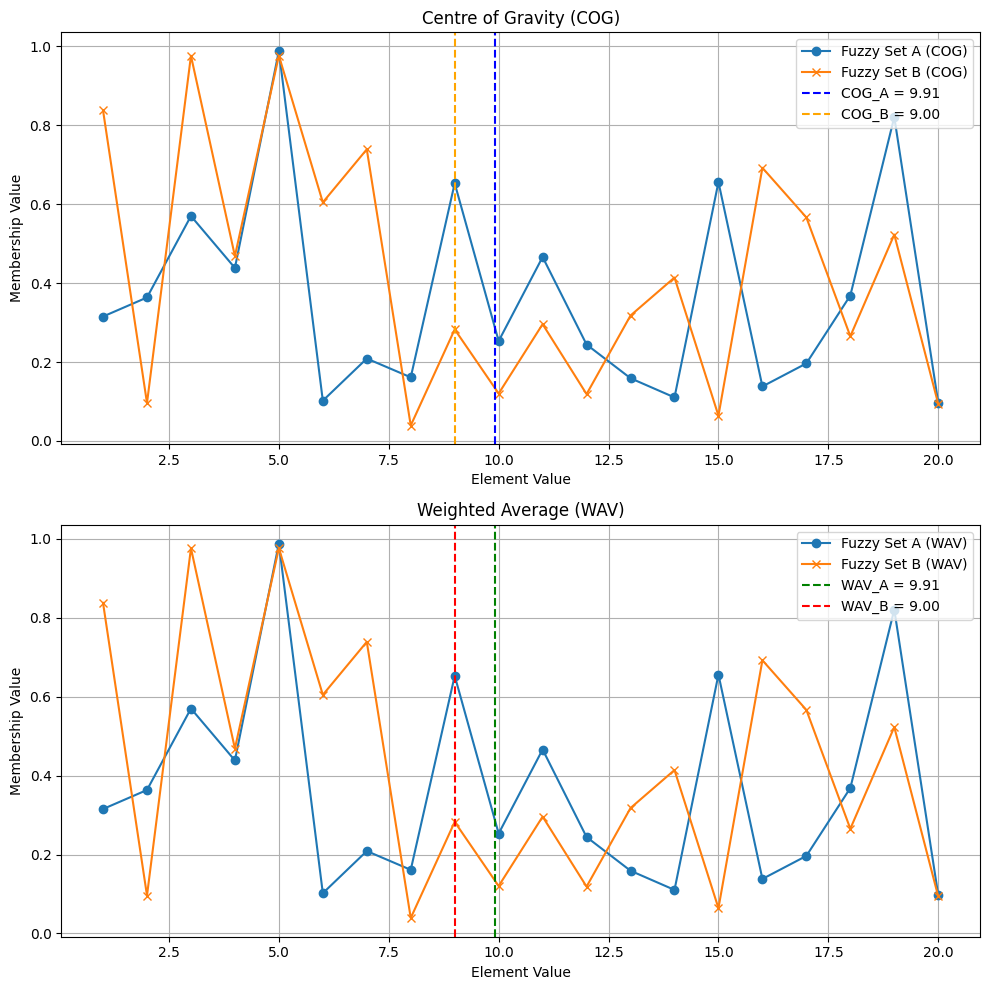

In [11]:
#7
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate fuzzy sets A and B
num_elements = 20
set_A = np.linspace(1, 20, num_elements)  # Values from 1 to 20
set_B = np.linspace(1, 20, num_elements)  # Values from 1 to 20

membership_A = np.random.rand(num_elements)  # Random membership values in [0, 1]
membership_B = np.random.rand(num_elements)  # Random membership values in [0, 1]

# Step 2: Calculate Centre of Gravity (COG)
COG_A = np.sum(set_A * membership_A) / np.sum(membership_A)
COG_B = np.sum(set_B * membership_B) / np.sum(membership_B)

# Step 3: Calculate Weighted Average (WAV)
WAV_A = np.average(set_A, weights=membership_A)
WAV_B = np.average(set_B, weights=membership_B)

# Display results
print("Centre of Gravity (COG) for Set A:", COG_A)
print("Centre of Gravity (COG) for Set B:", COG_B)
print("Weighted Average (WAV) for Set A:", WAV_A)
print("Weighted Average (WAV) for Set B:", WAV_B)

# Step 4: Plot graphs
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot COG
axs[0].plot(set_A, membership_A, label="Fuzzy Set A (COG)", marker="o")
axs[0].plot(set_B, membership_B, label="Fuzzy Set B (COG)", marker="x")
axs[0].axvline(COG_A, color="blue", linestyle="--", label=f"COG_A = {COG_A:.2f}")
axs[0].axvline(COG_B, color="orange", linestyle="--", label=f"COG_B = {COG_B:.2f}")
axs[0].set_title("Centre of Gravity (COG)")
axs[0].set_xlabel("Element Value")
axs[0].set_ylabel("Membership Value")
axs[0].grid()
axs[0].legend()

# Plot WAV
axs[1].plot(set_A, membership_A, label="Fuzzy Set A (WAV)", marker="o")
axs[1].plot(set_B, membership_B, label="Fuzzy Set B (WAV)", marker="x")
axs[1].axvline(WAV_A, color="green", linestyle="--", label=f"WAV_A = {WAV_A:.2f}")
axs[1].axvline(WAV_B, color="red", linestyle="--", label=f"WAV_B = {WAV_B:.2f}")
axs[1].set_title("Weighted Average (WAV)")
axs[1].set_xlabel("Element Value")
axs[1].set_ylabel("Membership Value")
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()


In [12]:
#8
import numpy as np

# Step 1: Initialize population
population = [13, 24, 8, 19]  # Initial population
binary_population = [format(x, '05b') for x in population]  # Binary encoding
population_size = len(population)
generations = 10  # Number of generations
crossover_rate = 0.7
mutation_rate = 0.01

# Fitness function
def fitness(x):
    return x**2

# Step 2: Roulette Wheel Selection
def roulette_wheel_selection(pop, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    cumulative_probs = np.cumsum(probabilities)
    r = np.random.rand()
    for i, cp in enumerate(cumulative_probs):
        if r <= cp:
            return pop[i]

# Step 3: One-point Crossover
def one_point_crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    return parent1, parent2

# Step 4: Mutation
def mutate(chromosome):
    if np.random.rand() < mutation_rate:
        point = np.random.randint(len(chromosome))
        chromosome = (chromosome[:point] +
                      ('1' if chromosome[point] == '0' else '0') +
                      chromosome[point + 1:])
    return chromosome

# Step 5: Genetic Algorithm
best_value = -1
best_solution = None

for generation in range(generations):
    # Calculate fitness values
    decoded_population = [int(chrom, 2) for chrom in binary_population]
    fitness_values = [fitness(x) for x in decoded_population]

    # Find best solution in this generation
    max_fitness = max(fitness_values)
    if max_fitness > best_value:
        best_value = max_fitness
        best_solution = decoded_population[fitness_values.index(max_fitness)]

    # Selection
    new_population = []
    for _ in range(population_size // 2):
        parent1 = roulette_wheel_selection(binary_population, fitness_values)
        parent2 = roulette_wheel_selection(binary_population, fitness_values)
        # Crossover
        child1, child2 = one_point_crossover(parent1, parent2)
        # Mutation
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])

    # Update population
    binary_population = new_population

# Output the best solution and its fitness value
decoded_best_solution = best_solution
print(f"Best value of x: {decoded_best_solution}")
print(f"Maximum value of f(x): {fitness(decoded_best_solution)}")


Best value of x: 27
Maximum value of f(x): 729


In [13]:
#9
import numpy as np

# Objective function
def f(x):
    # Convert chromosome string to individual digits
    a, b, c, d, e, f, g, h = [int(digit) for digit in x]
    return (a + b) - (c + d) + (e + f) - (g + h)

# One-point crossover
def one_point_crossover(parent1, parent2):
    point = len(parent1) // 2
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Two-point crossover at positions b and f
def two_point_crossover(parent1, parent2):
    point1, point2 = 1, 5  # b and f positions
    child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
    return child1, child2

# Uniform crossover
def uniform_crossover(parent1, parent2):
    child1, child2 = '', ''
    for gene1, gene2 in zip(parent1, parent2):
        if np.random.rand() < 0.5:
            child1 += gene1
            child2 += gene2
        else:
            child1 += gene2
            child2 += gene1
    return child1, child2

# Initial population
population = ["65413532", "87126601", "23921285", "41852094"]

# Step 1: Evaluate fitness of each individual
fitness = [f(x) for x in population]
ranked_indices = np.argsort(fitness)[::-1]  # Sort by fitness in descending order
ranked_population = [population[i] for i in ranked_indices]

# Print fitness and ranked population
print("Fitness of each individual:")
for i, x in enumerate(population):
    print(f"X{i + 1}: {x}, f(x) = {fitness[i]}")

print("\nRanked population (highest to lowest fitness):")
for i, x in enumerate(ranked_population):
    print(f"Rank {i + 1}: {x}, f(x) = {f(x)}")

# Step 2: One-point crossover for the two highest-ranked individuals
parent1, parent2 = ranked_population[0], ranked_population[1]
child1, child2 = one_point_crossover(parent1, parent2)
print(f"\nOne-point crossover:\nParent1: {parent1}, Parent2: {parent2}\nChild1: {child1}, Child2: {child2}")

# Step 3: Two-point crossover at positions b and f for the 2nd and 3rd ranked individuals
parent3 = ranked_population[2]
child3, child4 = two_point_crossover(parent2, parent3)
print(f"\nTwo-point crossover:\nParent2: {parent2}, Parent3: {parent3}\nChild3: {child3}, Child4: {child4}")

# Step 4: Uniform crossover for the 1st and 3rd ranked individuals
child5, child6 = uniform_crossover(parent1, parent3)
print(f"\nUniform crossover:\nParent1: {parent1}, Parent3: {parent3}\nChild5: {child5}, Child6: {child6}")

# Step 5: Combine all children into the next generation and evaluate
next_generation = [child1, child2, child3, child4, child5, child6]
next_fitness = [f(x) for x in next_generation]

# Find the best solution
best_index = np.argmax(next_fitness)
optimal_value = next_generation[best_index]
optimal_fitness = next_fitness[best_index]

print(f"\nOptimal value: {optimal_value}, f(x) = {optimal_fitness}")


Fitness of each individual:
X1: 65413532, f(x) = 9
X2: 87126601, f(x) = 23
X3: 23921285, f(x) = -16
X4: 41852094, f(x) = -19

Ranked population (highest to lowest fitness):
Rank 1: 87126601, f(x) = 23
Rank 2: 65413532, f(x) = 9
Rank 3: 23921285, f(x) = -16
Rank 4: 41852094, f(x) = -19

One-point crossover:
Parent1: 87126601, Parent2: 65413532
Child1: 87123532, Child2: 65416601

Two-point crossover:
Parent2: 65413532, Parent3: 23921285
Child3: 63921532, Child4: 25413285

Uniform crossover:
Parent1: 87126601, Parent3: 23921285
Child5: 87121601, Child6: 23926285

Optimal value: 87121601, f(x) = 18


<ipython-input-14-10ec5f297c71>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y="Mean", data=stats_df, ax=axes[0, 0], palette="Blues_d")
<ipython-input-14-10ec5f297c71>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-14-10ec5f297c71>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y="Variance", data=stats_df, ax=axes[0, 1], palette="Greens_d")
<ipython-input-14-10ec5f297c71>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

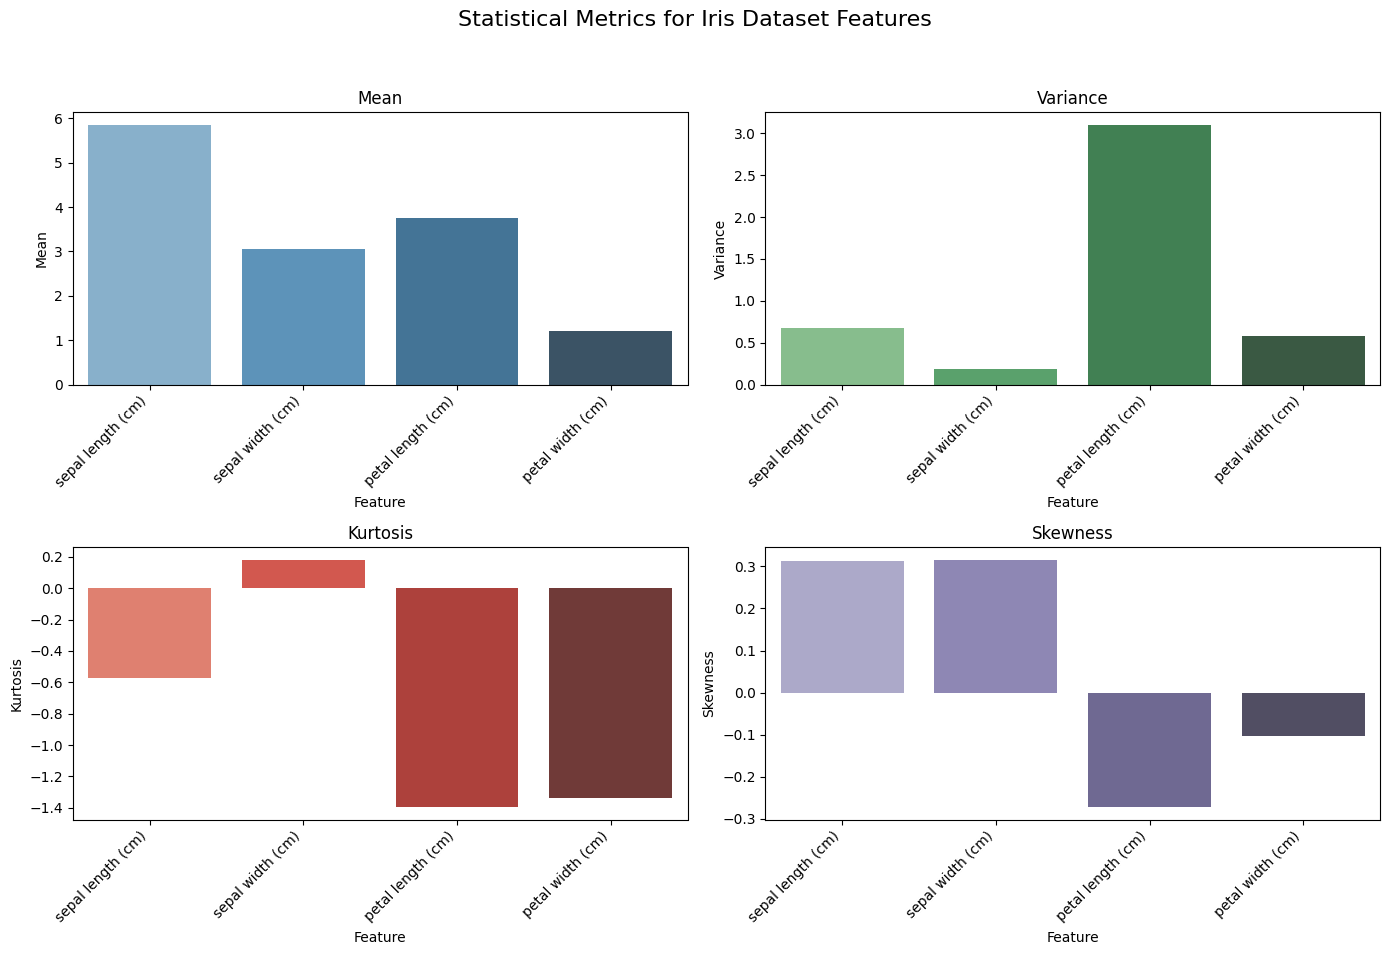

             Feature      Mean  Variance  Kurtosis  Skewness
0  sepal length (cm)  5.843333  0.681122 -0.573568  0.311753
1   sepal width (cm)  3.057333  0.188713  0.180976  0.315767
2  petal length (cm)  3.758000  3.095503 -1.395536 -0.272128
3   petal width (cm)  1.199333  0.577133 -1.336067 -0.101934


In [14]:
#10
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Calculate statistics for each feature
stats = {
    "Feature": [],
    "Mean": [],
    "Variance": [],
    "Kurtosis": [],
    "Skewness": []
}

for column in df.columns:
    stats["Feature"].append(column)
    stats["Mean"].append(np.mean(df[column]))
    stats["Variance"].append(np.var(df[column]))
    stats["Kurtosis"].append(kurtosis(df[column]))
    stats["Skewness"].append(skew(df[column]))

# Convert the results to a DataFrame
stats_df = pd.DataFrame(stats)

# Plot the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Statistical Metrics for Iris Dataset Features', fontsize=16)

# Plot Mean
sns.barplot(x="Feature", y="Mean", data=stats_df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Mean")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")

# Plot Variance
sns.barplot(x="Feature", y="Variance", data=stats_df, ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("Variance")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha="right")

# Plot Kurtosis
sns.barplot(x="Feature", y="Kurtosis", data=stats_df, ax=axes[1, 0], palette="Reds_d")
axes[1, 0].set_title("Kurtosis")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")

# Plot Skewness
sns.barplot(x="Feature", y="Skewness", data=stats_df, ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title("Skewness")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the statistics DataFrame
print(stats_df)


<ipython-input-15-466a0dd81b26>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y="Mean", data=stats_df, ax=axes[0, 0], palette="Blues_d")
<ipython-input-15-466a0dd81b26>:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-15-466a0dd81b26>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y="Variance", data=stats_df, ax=axes[0, 1], palette="Greens_d")
<ipython-input-15-466a0dd81b26>:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

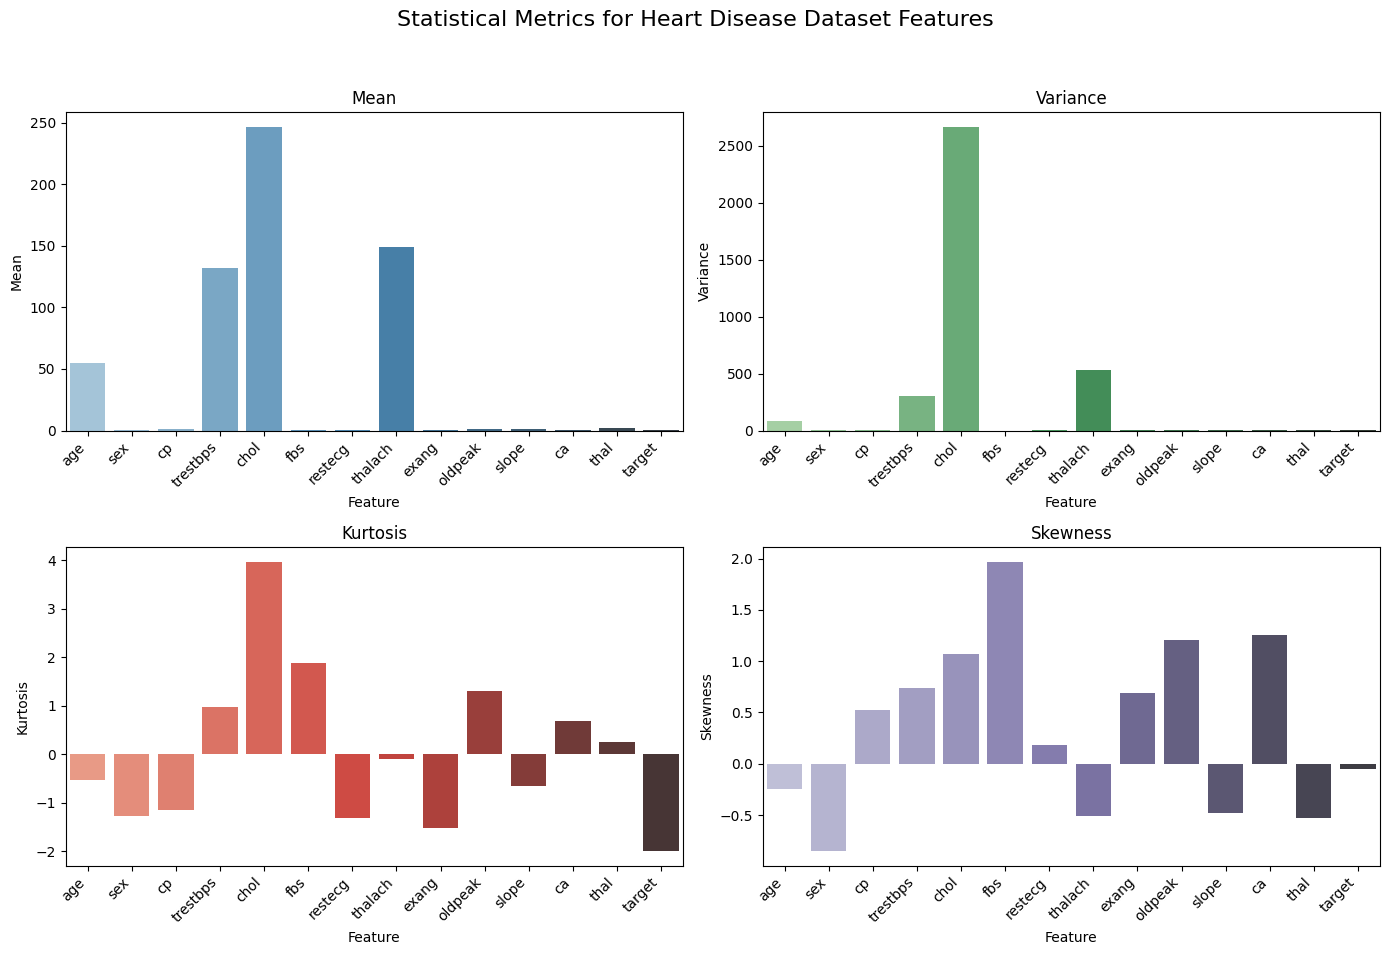

     Feature        Mean     Variance  Kurtosis  Skewness
0        age   54.434146    82.226151 -0.528905 -0.248502
1        sex    0.695610     0.211737 -1.277156 -0.850202
2         cp    0.942439     1.059126 -1.149748  0.528680
3   trestbps  131.611707   306.536058  0.980544  0.738685
4       chol  246.000000  2659.190244  3.971485  1.072500
5        fbs    0.149268     0.126987  1.874805  1.968452
6    restecg    0.529756     0.278383 -1.309082  0.180176
7    thalach  149.114146   528.746971 -0.094238 -0.513025
8      exang    0.336585     0.223296 -1.521633  0.691641
9    oldpeak    1.071512     1.379403  1.302220  1.209127
10     slope    1.385366     0.381249 -0.649825 -0.478433
11        ca    0.754146     1.061507  0.691859  1.259342
12      thal    2.323902     0.384843  0.243757 -0.523622
13    target    0.513171     0.249827 -1.997223 -0.052701


In [15]:
#11
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Heart Disease dataset
# Replace 'heart.csv' with the correct path to your dataset
heart_data = pd.read_csv('heart.csv')

# Calculate statistics for each feature
stats = {
    "Feature": [],
    "Mean": [],
    "Variance": [],
    "Kurtosis": [],
    "Skewness": []
}

for column in heart_data.columns:
    # Skip non-numeric columns if present
    if heart_data[column].dtype in ['float64', 'int64']:
        stats["Feature"].append(column)
        stats["Mean"].append(np.mean(heart_data[column]))
        stats["Variance"].append(np.var(heart_data[column]))
        stats["Kurtosis"].append(kurtosis(heart_data[column]))
        stats["Skewness"].append(skew(heart_data[column]))

# Convert the results to a DataFrame
stats_df = pd.DataFrame(stats)

# Plot the metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Statistical Metrics for Heart Disease Dataset Features', fontsize=16)

# Plot Mean
sns.barplot(x="Feature", y="Mean", data=stats_df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Mean")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")

# Plot Variance
sns.barplot(x="Feature", y="Variance", data=stats_df, ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("Variance")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha="right")

# Plot Kurtosis
sns.barplot(x="Feature", y="Kurtosis", data=stats_df, ax=axes[1, 0], palette="Reds_d")
axes[1, 0].set_title("Kurtosis")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")

# Plot Skewness
sns.barplot(x="Feature", y="Skewness", data=stats_df, ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title("Skewness")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display the statistics DataFrame
print(stats_df)
